In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import graphviz
from sklearn import tree

In [2]:
train = pd.read_pickle('./data_format1/df_train_good.pkl')

In [3]:
train.head()

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,age_range,gender
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [4]:
train = train.rename(columns = {"action_count_0":"Click Count"}) 
train = train.rename(columns = {"action_count_1":"Add-to-cart Count"}) 
train = train.rename(columns = {"action_count_2":"Purchase Count"}) 
train = train.rename(columns = {"action_count_3":"Add-to-favourite Count"}) 
train = train.rename(columns = {"action_0":"Click"}) 
train = train.rename(columns = {"action_1":"Add-to-cart"}) 
train = train.rename(columns = {"action_2":"Purchase"}) 
train = train.rename(columns = {"action_3":"Add-to-favourite"}) 

In [5]:
train.head()

,user_id,merchant_id,label,seller_item_count,brand_count,Click Count,Add-to-cart Count,Purchase Count,Add-to-favourite Count,Click,Add-to-cart,Purchase,Add-to-favourite,age_range,gender
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [6]:
user_info = train.iloc[:,[0,5,6,7,8,13,14]].drop_duplicates()
user_info.head()

,user_id,Click Count,Add-to-cart Count,Purchase Count,Add-to-favourite Count,age_range,gender
0,34176,410.0,0.0,34.0,7.0,6.0,0.0
4,81036,129.0,0.0,25.0,21.0,0.0,0.0
6,258963,497.0,0.0,12.0,51.0,3.0,0.0
7,359595,140.0,0.0,8.0,28.0,3.0,0.0
8,127926,152.0,0.0,11.0,0.0,4.0,1.0


In [8]:
click_plot = user_info.pivot_table(index="user_id", columns="gender",values='Click Count')
click_plot = click_plot.rename(columns = {0:"Female"})
click_plot = click_plot.rename(columns = {1:"Male"})
click_plot = click_plot.rename(columns = {2:"Unknown"})
click_plot = click_plot.fillna(0)
click_plot.head().round(1)

gender,Female,Male,Unknown
user_id,,,
1,0.0,27.0,0.0
4,49.0,0.0,0.0
6,217.0,0.0,0.0
7,6.0,0.0,0.0
8,61.0,0.0,0.0


In [9]:
click_plot['Female']

user_id
1           0.0
4          49.0
6         217.0
7           6.0
8          61.0
          ...  
424162    245.0
424163    132.0
424164    121.0
424167      0.0
424170      0.0
Name: Female, Length: 212062, dtype: float64

In [10]:
male_info = user_info[user_info.gender == 1]
male_info.head()

,user_id,Click Count,Add-to-cart Count,Purchase Count,Add-to-favourite Count,age_range,gender
8,127926,152.0,0.0,11.0,0.0,4.0,1.0
33,168810,24.0,0.0,1.0,0.0,0.0,1.0
54,144361,36.0,0.0,4.0,1.0,7.0,1.0
60,308014,30.0,0.0,9.0,0.0,3.0,1.0
63,149581,9.0,0.0,1.0,0.0,0.0,1.0


In [11]:
female_info = user_info[user_info.gender == 0]
female_info.head()

,user_id,Click Count,Add-to-cart Count,Purchase Count,Add-to-favourite Count,age_range,gender
0,34176,410.0,0.0,34.0,7.0,6.0,0.0
4,81036,129.0,0.0,25.0,21.0,0.0,0.0
6,258963,497.0,0.0,12.0,51.0,3.0,0.0
7,359595,140.0,0.0,8.0,28.0,3.0,0.0
9,283068,312.0,0.0,7.0,29.0,3.0,0.0


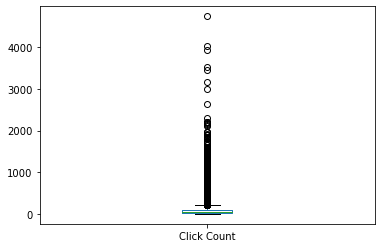

In [12]:
male_info['Click Count'].plot(kind = 'box')

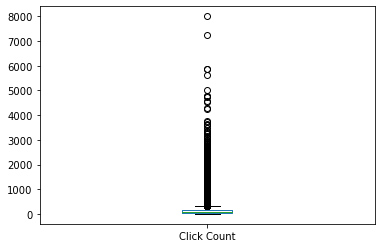

In [13]:
female_info['Click Count'].plot(kind = 'box')